In [2]:
# Set width of Jupyter cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

In [3]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import glob
import os
import json
import seaborn as sns
from datetime import date
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lifelines
import pickle

import foodie_features
import yelp_data_pulling_and_cleaning
import build_viva_las_foodie

In [3]:
# Set pandas dataframe display
pd.set_option('display.max_row', 200)
pd.set_option('display.max_columns', 25)

In [4]:
reload(foodie_features), reload(yelp_data_pulling_and_cleaning), reload(build_viva_las_foodie)

(<module 'foodie_features' from 'foodie_features.pyc'>,
 <module 'yelp_data_pulling_and_cleaning' from 'yelp_data_pulling_and_cleaning.pyc'>,
 <module 'build_viva_las_foodie' from 'build_viva_las_foodie.pyc'>)

In [5]:
raw_businesses_df = yelp_data_pulling_and_cleaning.pull_raw_business_data()

In [6]:
cities = ['Las Vegas']
yelp_businesses_df, categories = yelp_data_pulling_and_cleaning.clean_business_data( raw_businesses_df, \
                                                                         type_of_business_list=['Restaurant'], \
                                                                         city_filter_list=cities, \
                                                                         remove_hours=True, \
                                                                         required_num_of_closed_thresh_in_city=1000
                                                                       )
#del raw_businesses_df
#yelp_businesses_df

In [7]:
business_ids = yelp_businesses_df.index.values
reviews_df = yelp_data_pulling_and_cleaning.clean_reviews_data(business_ids)
reviews_df

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,HojKatUfX4UHWaPqtl63NQ,5,2017-07-17 10:32:50,3,ywpTVqkG1a-SpsIN-PImqA,4,Opened in October 2015 as a rebrand of culinar...,6,U4INQZOPSUaj8hMjLlZ3KA
1,pHJu8tj3sI8eC5aIHLFEfQ,0,2016-01-29 04:44:56,0,hBXTJJWYLRye5KnGjN8Dcw,5,I had a very yummy pizza at Nora's tonight. T...,0,YgGp54AKCFqCIKcQhGHwRw
2,WX8cx6tfFcEn0cK4cIbWag,0,2018-10-28 04:05:42,0,_hX5S_Jo0SO6jklB3Lu7wA,1,"First, we made a reservation & they weren't pr...",0,OS5p_5bdHXKCcN7ZEK2TXQ
3,3h5jLa-kbHg0cL7v9En0Lg,0,2012-12-30 20:09:04,0,ek-kaQnj6PLEwZGz_LSrdw,4,Low Prices - Great Food - Very nice Setting\nW...,4,d2WVEYfpHMtTjDwiLh_r6A
4,rdZ6xVABSoOVeAIiCaEj4w,0,2010-09-27 07:08:59,0,aPWQLR2RL8N3u03QWsXHYw,4,This is my first time here and my first time h...,0,7weuSPSSqYLUFga6IYP4pg
5,G4hjhtA_wQ-tSOGpgGlDjw,0,2017-09-03 02:47:37,0,C0lqD5lXMB2J8FudJV4uDw,5,Really really good! Get the pulpo taco! Very c...,0,uGcpEaM2ecZ2RRHsN-e1LA
6,PXShA3JZMXr2mEH3on5clw,2,2015-03-15 19:50:44,1,kvECsBzKB8nsB1xCOPcapw,5,Got the Stuffed French Toast and it was a glor...,1,vUGsv8bgAAWOsuoJMziS0g
7,OPxWcHK96_cbmiF7legDnA,0,2011-08-22 15:27:54,0,NoBYu_VJ_3aSOh0-wCR8KQ,2,Really not the best experience.\n\nThe waiter ...,0,f_s-9gqc9T8pXXu8pWMFPQ
8,h7s4MRVvB726jWHCHiQ9kw,2,2016-09-17 04:38:42,1,7zkdXbSYRzhnSWIjT9W4Ag,4,Lauren was our server and we had a party of si...,2,4AjocDGdZNPyhBLQpxpa_Q
9,5fpXjlC71y_mKORnPdX5zA,0,2016-08-05 05:59:12,0,zwHT6zP1debYSa0g20eK0Q,1,Currently sitting in the drive thru. 15 minute...,0,J4W2abNDYv4xyU2ff4V2qQ


In [8]:
chains, duplicate_locations_df = build_viva_las_foodie.calculate_additional_features(yelp_businesses_df, reviews_df)

In [9]:
yelp_businesses_df

,address,attributes,categories,city,is_open,latitude,longitude,name,review_count,stars,is_claimed,actual_review_count,actual_stars,is_chain,duplicate_location,has_parking,cost,open_dates,closed_dates,days_since_closed,age (in days)
business_id,,,,,,,,,,,,,,,,,,,,,
PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29","{u'BusinessParking': u'{'garage': False, 'stre...","Restaurants, Italian",Las Vegas,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,40,4.0,0,41,4.097561,0,0,1,2,2007-08-23,2016-08-09,827,3274
tstimHoMcYbkSC4eBA1wEg,6055 E Lake Mead Blvd,"{u'GoodForMeal': u'{'dessert': False, 'latenig...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,1,36.195598,-115.040622,Maria's Mexican Restaurant & Bakery,184,4.5,1,189,4.301587,0,0,1,2,2010-03-23,2018-11-14,0,3158
kANF0dbeoW34s2vwh6Umfw,6125 Spring Mountain Rd,"{u'BusinessParking': u'{'garage': False, 'stre...","Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,0,36.125031,-115.225620,Dairy Queen,33,2.0,0,33,2.242424,1,0,1,1,2008-11-02,2017-01-05,678,2986
6fPQJq4f_yiq1NHn0fd11Q,3655 Las Vegas Blvd S,"{u'BusinessParking': u'{'garage': True, 'stree...","French, Restaurants, Creperies",Las Vegas,1,36.112725,-115.170350,La Creperie,535,3.5,1,543,3.648250,0,0,1,2,2005-12-25,2018-11-14,8,4707
k-dDZvTeLysoJvjHI-qr9g,2411 W Sahara Ave,"{u'Alcohol': u'u'beer_and_wine'', u'HasTV': u'...","Buffets, Restaurants",Las Vegas,1,36.142950,-115.174937,Feast Buffet,287,3.0,1,295,2.966102,1,0,1,2,2007-10-27,2018-11-14,1,4036
PWjgwphd2prhtqTPWwLbXw,"3500 Las Vegas Blvd S, Ste E11","{u'BusinessParking': u'{'garage': True, 'stree...","Sandwiches, Restaurants, Delis, Desserts, Food",Las Vegas,0,36.117327,-115.176501,Stage Deli Of Las Vegas,28,3.5,0,28,3.678571,0,0,1,2,2006-06-12,2016-03-18,971,3567
eY98EH_PHGnJVaJ7t2UpoQ,1263 Silverado Ranch Blvd,"{u'GoodForMeal': u'{'dessert': False, 'latenig...","Middle Eastern, Restaurants, Vegetarian, Juice...",Las Vegas,0,36.012764,-115.136056,Pita Pit,77,4.0,0,78,4.012821,1,1,1,1,2014-01-07,2016-12-18,696,1076
iwGhazq9eP51PSerTrMrwg,"3342 E Sandhill Rd, Ste 11","{u'Alcohol': u'u'full_bar'', u'HasTV': u'True'...","Dive Bars, Food, Bars, Pubs, Restaurants, Nigh...",Las Vegas,1,36.129050,-115.091350,Mr G's Pub & Grub,27,4.0,1,28,3.892857,0,0,1,1,2013-05-04,2018-11-14,58,2020
0G83H_zoum-Q4bWU2olTqQ,"4012 S Rainbow Blvd, Ste J","{u'GoodForMeal': u'{'dessert': True, 'latenigh...","Restaurants, Food, Delis, Desserts, Bakeries, ...",Las Vegas,1,36.116100,-115.241800,Bonjour Bakery & Deli,39,4.5,1,39,4.384615,0,0,1,1,2017-08-17,2018-11-14,207,454


In [10]:
features = ['is_chain', 'duplicate_location', 'cost_1', 'cost_2', 'cost_3', 'cost_4', 'is_claimed', 'sentiment', 'avg_review_length', \
            'review_count_before_date', 'rating_before_date' ]# + ['city_Las Vegas']#['city_%s'%city for city in cities]
data = build_viva_las_foodie.build_X_and_y(yelp_businesses_df, reviews_df, date(2018, 1, 1), forecast_months=[1, 3, 6, 9], \
                                           ignore_distance=False, load_NLP=True, do_distance=False, features=features)
X = data[features]

build_viva_las_foodie.py:113: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reviews_for_open_businesses_before_date = reviews_for_open_businesses[before_date_filter]
foodie_features.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  category_counts.append( df[df.categories.str.contains(category)].shape[0] )
foodie_features.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  category_counts.append( df[df.categories.str.contains(category)].shape[0] )
foodie_features.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reviews_after_date_df = reviews_for_open_businesses[after_date_filter]
foodie_features.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reviews_after_date_df = reviews_for_open_businesses[after_date_filter]
foodie_features.py:36: UserWarning: Boolean Series key will be reindexed to ma

In [11]:
data[ [column for column in data if column.startswith('closed_forecast')] ].sum()

closed_forecast_1_months     30
closed_forecast_3_months     77
closed_forecast_6_months    146
closed_forecast_9_months    218
dtype: int64

In [13]:
forecast_length = '6_months'
y = data['closed_forecast_%s'%forecast_length]

In [14]:
#X = data.append(pd.read_csv('data_2018_1_1.csv').set_index('business_id'))[features]
#y = data.append(pd.read_csv('data_2018_1_1.csv').set_index('business_id'))['closed_forecast_6_months']

In [15]:
#data.to_csv('data_2018_1_1.csv')

In [16]:
# EDA of features
num_of_close = y[y == 1].shape[0]
num_of_open = y[y == 0].shape[0]
print "Number open(closed) in dataset: %s(%s)"%(num_of_open, num_of_close)

num_cost_1_closed = float(X[ (X.index.isin(y[y == 1].index)) & (X.cost_1 == 1) ].shape[0])
num_cost_1_open =  float( X[ (X.index.isin(y[y == 0].index)) & (X.cost_1 == 1)].shape[0])
num_cost_2_closed = float( X[ (X.index.isin(y[y == 1].index)) & (X.cost_2 == 1) ].shape[0])
num_cost_2_open = float( X[ (X.index.isin(y[y == 0].index)) & (X.cost_2 == 1)].shape[0])
num_cost_3_closed =  float( X[ (X.index.isin(y[y == 1].index)) & (X.cost_3 == 1) ].shape[0])
num_cost_3_open = float( X[ (X.index.isin(y[y == 0].index)) & (X.cost_3 == 1)].shape[0])
num_cost_4_closed = float( X[ (X.index.isin(y[y == 1].index)) & (X.cost_4 == 1) ].shape[0])
num_cost_4_open = float( X[ (X.index.isin(y[y == 0].index)) & (X.cost_4 == 1)].shape[0])

avg_cost_closed = (1 * num_cost_1_closed + 2 * num_cost_2_closed + 3 * num_cost_3_closed + 4 * num_cost_4_closed) / num_of_close
avg_cost_open = (1 * num_cost_1_open + 2 * num_cost_2_open + 3 * num_cost_3_open + 4 * num_cost_4_open) / num_of_open

print "Avg cost for closed restaurants: ", avg_cost_closed
print "Avg cost for open resturants: ", avg_cost_open

print "Sentiment for closed:", X[X.index.isin(y[y == 1].index)].sentiment.mean(), "Sentiment for open:", X[X.index.isin(y[y == 0].index)].sentiment.mean()

print "Avg review length for closed:", X[X.index.isin(y[y == 1].index)].avg_review_length.mean(), "Avg review length for open:", X[X.index.isin(y[y == 0].index)].avg_review_length.mean()

print "Avg rating for closed:", X[X.index.isin(y[y == 1].index)].rating_before_date.mean(), "Avg rating for open:", X[X.index.isin(y[y == 0].index)].rating_before_date.mean()

print "Avg review count for closed:", X[X.index.isin(y[y == 1].index)].review_count_before_date.mean(), "Avg review count for open:", X[X.index.isin(y[y == 0].index)].review_count_before_date.mean()

print "Is chain for closed:", X[ (X.index.isin(y[y == 1].index)) & (X.is_chain == 1) ].shape[0], "Is not chain for closed:", X[ (X.index.isin(y[y == 1].index)) & (X.is_chain == 0)].shape[0] 
print "Is chain for open:", X[ (X.index.isin(y[y == 0].index)) & (X.is_chain == 1) ].shape[0], "Is not chain for open:", X[ (X.index.isin(y[y == 0].index)) & (X.is_chain == 0) ].shape[0]

print "Dup loc for closed:", X[ (X.index.isin(y[y == 1].index)) & (X.duplicate_location == 1) ].shape[0], "Not dup loc for closed:", X[ (X.index.isin(y[y == 1].index)) & (X.duplicate_location == 0)].shape[0] 
print "Dup loc for open:", X[ (X.index.isin(y[y == 0].index)) & (X.duplicate_location == 1) ].shape[0], "Not dup loc for open:", X[ (X.index.isin(y[y == 0].index)) & (X.duplicate_location == 0) ].shape[0]

print "Is claimed for closed:", X[ (X.index.isin(y[y == 1].index)) & (X.is_claimed == 1) ].shape[0], "Is not claimed for closed:", X[ (X.index.isin(y[y == 1].index)) & (X.is_claimed == 0)].shape[0] 
print "Is claimed for open:", X[ (X.index.isin(y[y == 0].index)) & (X.is_claimed == 1) ].shape[0], "Is not claimed for open:", X[ (X.index.isin(y[y == 0].index)) & (X.is_claimed == 0) ].shape[0]

Number open(closed) in dataset: 3625(146)
Avg cost for closed restaurants:  1.67808219178
Avg cost for open resturants:  1.60634482759
Sentiment for closed: 0.552479452055 Sentiment for open: 0.490156473563
Avg review length for closed: 482.678082192 Avg review length for open: 475.312689655
Avg rating for closed: 3.7282927039 Avg rating for open: 3.48971984777
Avg review count for closed: 204.821917808 Avg review count for open: 244.499586207
Is chain for closed: 36 Is not chain for closed: 110
Is chain for open: 1548 Is not chain for open: 2077
Dup loc for closed: 15 Not dup loc for closed: 131
Dup loc for open: 322 Not dup loc for open: 3303
Is claimed for closed: 0 Is not claimed for closed: 146
Is claimed for open: 2840 Is not claimed for open: 785


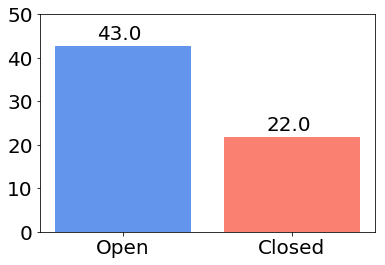

In [17]:
chain_df = pd.DataFrame(data= {'Open': [3100, 4155], 'Closed': [132, 473]}, index= ['Yes','No'] )

objects = ('Open', 'Closed')
y_pos = np.arange(len(objects))
performance = [ 100*float(chain_df.Open.Yes)/(chain_df.Open.Yes + chain_df.Open.No), 100*float(chain_df.Closed.Yes)/(chain_df.Closed.Yes + chain_df.Closed.No) ]

barplot = plt.bar(y_pos, performance, align='center')#, alpha=0.5)
barplot[0].set_color('cornflowerblue')
barplot[1].set_color('salmon')
plt.xticks(y_pos, objects)
xlocs=[i+1 for i in range(0,2)]
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=15)

for i, v in enumerate(performance):
    plt.text(xlocs[i] - 1.15, v + 1.5, str(round(v,0)),fontsize=20)

plt.ylim([0,50])
#plt.tick_params(axis='both', which='major', labelsize=20)
#plt.tick_params(axis='both', which='minor', labelsize=15)

#plt.yticks
#plt.ylabel('Percentage')
#plt.legend()
#plt.title('Programming language usage')

plt.show()

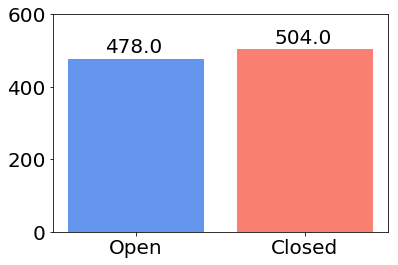

In [18]:
objects = ('Open', 'Closed')
y_pos = np.arange(len(objects))
performance = [ 478, 504 ]

barplot = plt.bar(y_pos, performance, align='center')
barplot[0].set_color('cornflowerblue')
barplot[1].set_color('salmon')
plt.xticks(y_pos, objects)
xlocs=[i+1 for i in range(0,2)]
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=15)

for i, v in enumerate(performance):
    plt.text(xlocs[i] - 1.18, v + 15.1, str(round(v,2)),fontsize=20)

plt.ylim([0,600])

plt.show()

In [19]:
### Train/test split
dropped_columns = []#['business_category_counts','num_rest_within_a_tenth_mile_at_date', 'num_rest_within_a_quarter_mile_at_date', 'num_rest_within_a_half_mile_at_date', \
                   #'num_rest_within_1_mile_at_date','num_rest_within_5_miles_at_date', 'num_rest_within_10_miles_at_date']
X_train, X_test, y_train, y_test = train_test_split(X.drop(dropped_columns,axis=1).values, y.values, test_size=0.2)
X_train_no_val, X_train_val, y_train_no_val, y_train_val = train_test_split(X_train, y_train, test_size=0.2)

In [20]:
### View correlation matrix
#sns.heatmap(X.corr())

In [21]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.rcParams.update({'font.size': 17})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Open','Closed'], rotation=45)
    plt.yticks(tick_marks, ['Open','Closed'])
    plt.tick_params(axis='both', which='major')
    plt.tick_params(axis='both', which='minor')
    for (j,i),label in np.ndenumerate(cm):
        plt.text(i,j,label,ha='center',va='center')
        plt.text(i,j,label,ha='center',va='center')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)

In [22]:
param_grid_logistic = {
    'logistic__C': np.logspace(-4, 4, 4),
    'logistic__solver' : [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logistic__max_iter' : [500, 1000, 2000]
}
param_grid_rf = {
    'rf__max_depth' : [4, 6, 8],
    'rf__n_estimators' : [500, 1000, 2000]
}
param_grid_xgb = {
    'xgb__min_child_weight': [1, 5, 10],
    'xgb__gamma': [0.5, 1, 1.5, 2, 5],
    #'xgb_subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__learning_rate': [0.01, 0.02, 0.05, 0.1],
    'xgb__max_depth': [3, 4, 5]
    }

#pipe = Pipeline([ ( 'scaler', StandardScaler() ), ( 'logistic', LogisticRegression(penalty='l2', class_weight='balanced') ) ])
#grid_search = GridSearchCV(pipe, param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1) #roc_auc

#pipe = Pipeline([ ( 'rf', RandomForestClassifier(class_weight='balanced') ) ])
#grid_search = GridSearchCV(pipe, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1) #roc_auc

balanced_class_ratio = float((y_train==0).sum())/(y_train==1).sum()
pipe = Pipeline([ ( 'xgb', xgb.XGBClassifier(scale_pos_weight=balanced_class_ratio) ) ])
grid_search = GridSearchCV(pipe, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
y_pred_train = grid_search.best_estimator_.predict(X_train)
print "F1 Score:", f1_score(y_train, y_pred_train)
print "Precision Score:", precision_score(y_train, y_pred_train)
print "Recall Score:", recall_score(y_train, y_pred_train)
print "Accuracy Score:", accuracy_score(y_train, y_pred_train)
confusion_matrix(y_true=y_train, y_pred=y_pred_train)

Best parameter (CV score=0.934):
{'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0.5, 'xgb__learning_rate': 0.02, 'xgb__min_child_weight': 10, 'xgb__max_depth': 3}
Pipeline(memory=None,
     steps=[('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.5, learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=10, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=24.5593220339, seed=None,
       silent=True, subsample=1))])
F1 Score: 0.3240223463687151
Precision Score: 0.1939799331103679
Recall Score: 0.9830508474576272
Accuracy Score: 0.8395225464190982


array([[2416,  482],
       [   2,  116]])

In [23]:
#with open('trained_classifier_%s.pkl'%forecast_length, 'wb') as fid:
#    pickle.dump(grid_search.best_estimator_, fid)

In [24]:
#with open('trained_classifier_6_months.pkl', 'rb') as fid:
#    gs_model = pickle.load(fid)

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, grid_search.best_estimator_.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
opt_fpr, opt_tpr, opt_threshold = fpr[(tpr + 1 - fpr).argmax()], tpr[(tpr + 1 - fpr).argmax()], thresholds[(tpr + 1 - fpr).argmax()]

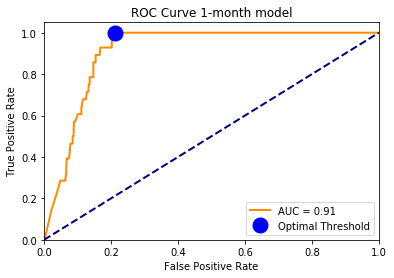

In [26]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot([opt_fpr],[opt_tpr],'bo', label='Optimal Threshold' %opt_threshold, markersize=15)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve 1-month model')
plt.legend(loc="lower right")
plt.show()

F1 Score: 0.2608695652173913
Precision Score: 0.15083798882681565
Recall Score: 0.9642857142857143
Accuracy Score: 0.7973509933774835


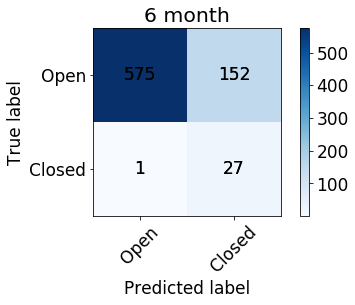

In [27]:
y_pred_roc = np.array([1 if grid_search.best_estimator_.predict_proba(X_test)[i,1] > opt_threshold else 0 for i in range(X_test.shape[0]) ])
print "F1 Score:", f1_score(y_test, y_pred_roc)
print "Precision Score:", precision_score(y_test, y_pred_roc)
print "Recall Score:", recall_score(y_test, y_pred_roc)
print "Accuracy Score:", accuracy_score(y_test, y_pred_roc)
plot_confusion_matrix(confusion_matrix(y_true=y_test, y_pred=y_pred_roc), title='%s'%forecast_length.replace('_',' ')[:-1])

F1 Score: 0.27083333333333337
Precision Score: 0.15853658536585366
Recall Score: 0.9285714285714286
Accuracy Score: 0.8145695364238411


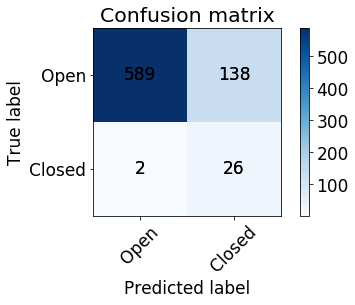

In [28]:
y_pred_test = grid_search.best_estimator_.predict(X_test)
print "F1 Score:", f1_score(y_test, y_pred_test)
print "Precision Score:", precision_score(y_test, y_pred_test)
print "Recall Score:", recall_score(y_test, y_pred_test)
print "Accuracy Score:", accuracy_score(y_test, y_pred_test)
plot_confusion_matrix(confusion_matrix(y_true=y_test, y_pred=y_pred_test))

In [58]:
# Investigate coefficients, feature importances, etc.
features_to_names = { 'f{i}'.format(i=i) : X.columns.values[i] for i in range(len(X.columns)) }
print features_to_names
if 'scaler' in grid_search.best_estimator_.named_steps:
    print grid_search.best_estimator_.named_steps['scaler'].mean_
    print grid_search.best_estimator_.named_steps['logistic'].coef_
elif 'xgb' in grid_search.best_estimator_.named_steps:
    print 'gain', sorted(grid_search.best_estimator_.named_steps['xgb'].get_booster().get_score(importance_type='gain').items(), key = lambda x : x[1])
    print 'weight', sorted(grid_search.best_estimator_.named_steps['xgb'].get_booster().get_score(importance_type='weight').items(), key = lambda x : x[1])
    print 'cover', sorted(grid_search.best_estimator_.named_steps['xgb'].get_booster().get_score(importance_type='cover').items(), key = lambda x : x[1])
    print 'total_gain', sorted(grid_search.best_estimator_.named_steps['xgb'].get_booster().get_score(importance_type='total_gain').items(), key = lambda x : x[1])
    print 'total_cover', sorted(grid_search.best_estimator_.named_steps['xgb'].get_booster().get_score(importance_type='total_cover').items(), key = lambda x : x[1])
    print 'fscore', sorted(grid_search.best_estimator_.named_steps['xgb'].get_booster().get_fscore().items(), key = lambda x : x[1])
elif 'rf' in grid_search.best_estimator_.named_steps:
    print grid_search.best_estimator_.named_steps['rf'].feature_importances_
else:
    print "Invalid pipeline"

{'f0': 'is_chain', 'f1': 'duplicate_location', 'f2': 'cost_1', 'f3': 'cost_2', 'f4': 'cost_3', 'f5': 'cost_4', 'f6': 'is_claimed', 'f7': 'sentiment', 'f8': 'avg_review_length', 'f9': 'review_count_before_date', 'f10': 'rating_before_date'}
gain [('f0', 29.02197445), ('f8', 31.492763291463422), ('f9', 31.66152941052632), ('f7', 32.271814595652174), ('f10', 58.6538886375), ('f6', 1116.9014702300005)]
weight [('f7', 23), ('f0', 34), ('f9', 57), ('f8', 82), ('f6', 100), ('f10', 104)]
cover [('f8', 305.3904445304878), ('f7', 320.77867970000005), ('f9', 331.4740964736842), ('f10', 650.5315079038462), ('f0', 720.1235397058822), ('f6', 1071.6069893599995)]
total_gain [('f7', 742.2517357), ('f0', 986.7471313), ('f9', 1804.7071764000002), ('f8', 2582.4065899000007), ('f10', 6100.0044183), ('f6', 111690.14702300006)]
total_cover [('f7', 7377.909633100001), ('f9', 18894.023499), ('f0', 24484.200349999996), ('f8', 25042.0164515), ('f10', 67655.276822), ('f6', 107160.69893599996)]
fscore [('f7', 23)

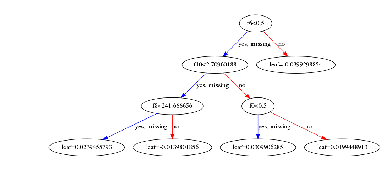

In [50]:
#xgb.plot_importance(grid_search.best_estimator_.named_steps['xgb'].get_booster(), importance_type='gain')
#xgb.plot_importance(grid_search.best_estimator_.named_steps['xgb'].get_booster(), importance_type='weight')
#xgb.plot_importance(grid_search.best_estimator_.named_steps['xgb'].get_booster(), importance_type='cover')
xgb.plot_tree(grid_search.best_estimator_.named_steps['xgb'].get_booster())

In [ ]:
# look at 3 and 4 star restaurants, but make sure to separate these because you've trained on some of them
#data[ (data.cost_3 == 1) | (data.cost_4 == 1) ][features]

#grid_search.best_estimator_.predict(X[ (X.cost_3 == 1) | (X.cost_4 == 1) ].values)
#y[ X[ (X.cost_3 == 1) | (X.cost_4 == 1) ].index ].values

In [ ]:
metrics_df = pd.DataFrame(data = { 'F1':        [0.08,0.22,0.37,0.44], 'Recall'  : [0.80,0.95,0.88,0.96], \
                                   'Precision': [0.04,0.12,0.24,0.28], 'Accuracy': [0.88,0.82,0.87,0.85] }, \
                          index= [1,3,6,9] )
metrics_df

In [ ]:
#plt.plot(metrics_df.index,100*metrics_df.Recall, '-o')
#plt.plot(metrics_df.index,100*metrics_df.Accuracy, '-o')
#plt.plot(metrics_df.index,[100*metrics_df.Accuracy.mean() for i in range(metrics_df.Accuracy.shape[0])], '--')
#plt.plot(metrics_df.index,100*metrics_df.Precision, '-o')
plt.plot(metrics_df.index,100*metrics_df.F1, '-o')
plt.xticks(metrics_df.index)
plt.xlabel('Months')
plt.ylabel('Percentage')
#plt.yticks([80, 82, 84, 86, 88, 90])
#plt.title('Accuracy across models')
#plt.legend()

In [ ]:
model = Pipeline([ ( 'scaler', StandardScaler() ), ( 'lr', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, class_weight='balanced') ) ])
#model = Pipeline([ ( 'scaler', StandardScaler() ), ( 'lr', RandomForestClassifier(max_depth=5, n_estimators=1000, class_weight='balanced') ) ])
model.fit(X_train_no_val, y_train_no_val)
y_pred_val = model.predict(X_train_val)
print "F1 score:", f1_score(y_train_val, y_pred_val)
print "Accuracy score:", accuracy_score(y_train_val, y_pred_val)
plot_confusion_matrix(confusion_matrix(y_true=y_train_val, y_pred=y_pred_val))

In [ ]:
clf = RandomForestClassifier(max_depth=3, class_weight='balanced')
clf.fit(X_train_no_val, y_train_no_val)
y_pred_val = clf.predict(X_train_val)
print "F1 score:", f1_score(y_train_val, y_pred_val)
#print "Precision Score:", precision_score(y_train_val, y_pred_val)
#print "Recall Score:", recall_score(y_train_val, y_pred_val)
print "Accuracy score:", accuracy_score(y_train_val, y_pred_val)
plot_confusion_matrix(confusion_matrix(y_true=y_train_val, y_pred=y_pred_val))
clf.feature_importances_

In [ ]:
### Define simplest model
clf = LogisticRegression(solver='lbfgs',max_iter=1000,random_state=42,class_weight='balanced')
clf.fit(X_train_no_val, y_train_no_val)
y_pred_val = clf.predict(X_train_val)
print "F1 score:", f1_score(y_train_val, y_pred_val)
#print "Precision Score:", precision_score(y_train_val, y_pred_val)
#print "Recall Score:", recall_score(y_train_val, y_pred_val)
print "Accuracy score:", accuracy_score(y_train_val, y_pred_val)
plot_confusion_matrix(confusion_matrix(y_true=y_train_val, y_pred=y_pred_val)) #(clf.predict_proba(X_train_val) >= 0.5).astype(int).sum(axis=1)) #y_pred_val

In [ ]:
balanced_class_ratio = float((y_train_no_val==0).sum())/(y_train_no_val==1).sum()
clf = xgb.XGBClassifier(scale_pos_weight=balanced_class_ratio, learning_rate=0.05)
clf.fit(X_train_no_val, y_train_no_val)
y_pred_val = clf.predict(X_train_val)
print "F1 Score:", f1_score(y_train_val, y_pred_val)
#print "Precision Score:", precision_score(y_train_val, y_pred_val)
#print "Recall Score:", recall_score(y_train_val, y_pred_val)
print "Accuracy Score:", accuracy_score(y_train_val, y_pred_val)
#print "Confusion matrix:", confusion_matrix(y_true=y_train_val, y_pred=y_pred_val)
plot_confusion_matrix(confusion_matrix(y_true=y_train_val,y_pred=y_pred_val))
clf.feature_importances_

In [ ]:
#### Save important files to be used for model in web app
business_names_str = np.array([ str(name.encode('utf-8')) for name in yelp_businesses_df.name.values ]).astype(str)
np.savetxt('VivaLasFoodieRestaurantNames.csv', np.vectorize(lambda x: x.decode('UTF-8'))(business_names_str), delimiter=',', fmt='%s')

np.savetxt('chains.csv', np.vectorize(lambda x: x.decode('UTF-8'))(np.array([str(name.encode('utf-8')) for name in chains]).astype(str)),delimiter=',', fmt='%s')

np.savetxt('duplicate_locations.csv', duplicate_locations_df.values, delimiter=',')

## name_to_id_dict.json
with open('name_to_id_dict.json', 'w') as fp:
    json.dump(name_to_id_dict, fp)

## id_to_features_dict.json
with open('id_to_features_dict.json', 'w') as fp:
    json.dump(id_to_features_dict, fp)

In [ ]:
def dist_of_open_businesses_in_city(businesses_df, categories):
    open_businesses = []
    closed_businesses = []
    valid_categories = []
    
    for category in categories:
        category_df = businesses_df[businesses_df['categories'].str.contains(category, na=False)]
        num_open = category_df[category_df.is_open == 1].shape[0]
        num_closed = category_df[category_df.is_open == 0].shape[0]
        if num_open + num_closed > 100 and num_closed > 50:
            open_businesses.append(category_df[category_df.is_open == 1].shape[0])
            closed_businesses.append(category_df[category_df.is_open == 0].shape[0]) 
            valid_categories.append(category)
        
    city_business_distribution = pd.DataFrame(data={'Open' : open_businesses, 'Closed' : closed_businesses}, index=valid_categories)
    
    return city_business_distribution

city_business_distribution = dist_of_open_businesses_in_city(yelp_businesses_df, categories)
city_business_distribution

In [ ]:
#### Survival Analysis

In [ ]:
features = ['is_chain','duplicate_location','cost_2','cost_3','cost_4', 'is_claimed', 'sentiment', 'avg_review_length', \
            'review_count_before_date', 'rating_before_date','age (in days)', 'is_open' ]# + ['city_Las Vegas']#['city_%s'%city for city in cities]
data_survival = build_X_and_y(yelp_businesses_df, reviews_df, NOV_14_2018, forecast_months=None, load_NLP=True, ignore_distance=True, do_distance=True, features=features)
data_survival_train, data_survival_test = train_test_split(data_survival, test_size=0.2)
data_survival_train

In [ ]:
cph = lifelines.CoxPHFitter()
cph.fit(data_survival_train.replace(), duration_col='age (in days)', event_col='is_open')
cph.print_summary()

In [ ]:
fpr, tpr, thresholds = roc_curve(data_survival_test.is_open.values, cph.predict_survival_function( data_survival_test.drop(['is_open'],axis=1) ).loc[94])
roc_auc = auc(fpr, tpr)
opt_fpr, opt_tpr, opt_threshold = fpr[(tpr + 1 - fpr).argmax()], tpr[(tpr + 1 - fpr).argmax()], thresholds[(tpr + 1 - fpr).argmax()]

In [ ]:
# look at wrongly classified xgboost examples and compare the probabilities to 
# train/test split them together

In [ ]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot([opt_fpr],[opt_tpr],'bo', label='Optimal Threshold' %opt_threshold, markersize=15)
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve 1-month model')
plt.legend(loc="lower right")
plt.show()

In [ ]:
survival_probs = cph.predict_survival_function(data_survival_test.drop(['is_open'],axis=1))

In [ ]:
survival_length = 94 #[34, 94, 183, 269]

In [ ]:
y_pred_roc = np.array([1 if survival_probs.loc[survival_length].iloc[i] > 0.00009 else 0 for i in range(data_survival_test.shape[0]) ])
#print "F1 Score:", f1_score(data_survival_test.is_open.values, y_pred_roc)
#print "Precision Score:", precision_score(data_survival_test.is_open.values, y_pred_roc)
#print "Recall Score:", recall_score(data_survival_test.is_open.values, y_pred_roc)
#print "Accuracy Score:", accuracy_score(data_survival_test.is_open.values, y_pred_roc)
plot_confusion_matrix(confusion_matrix(y_true=data_survival_test.is_open.values, y_pred=y_pred_roc))#, title='3 months')